In [1]:
%run 'effLib.ipynb'


Loading Eff Lib


In [2]:
f = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/Pi_Plus_All.root" )


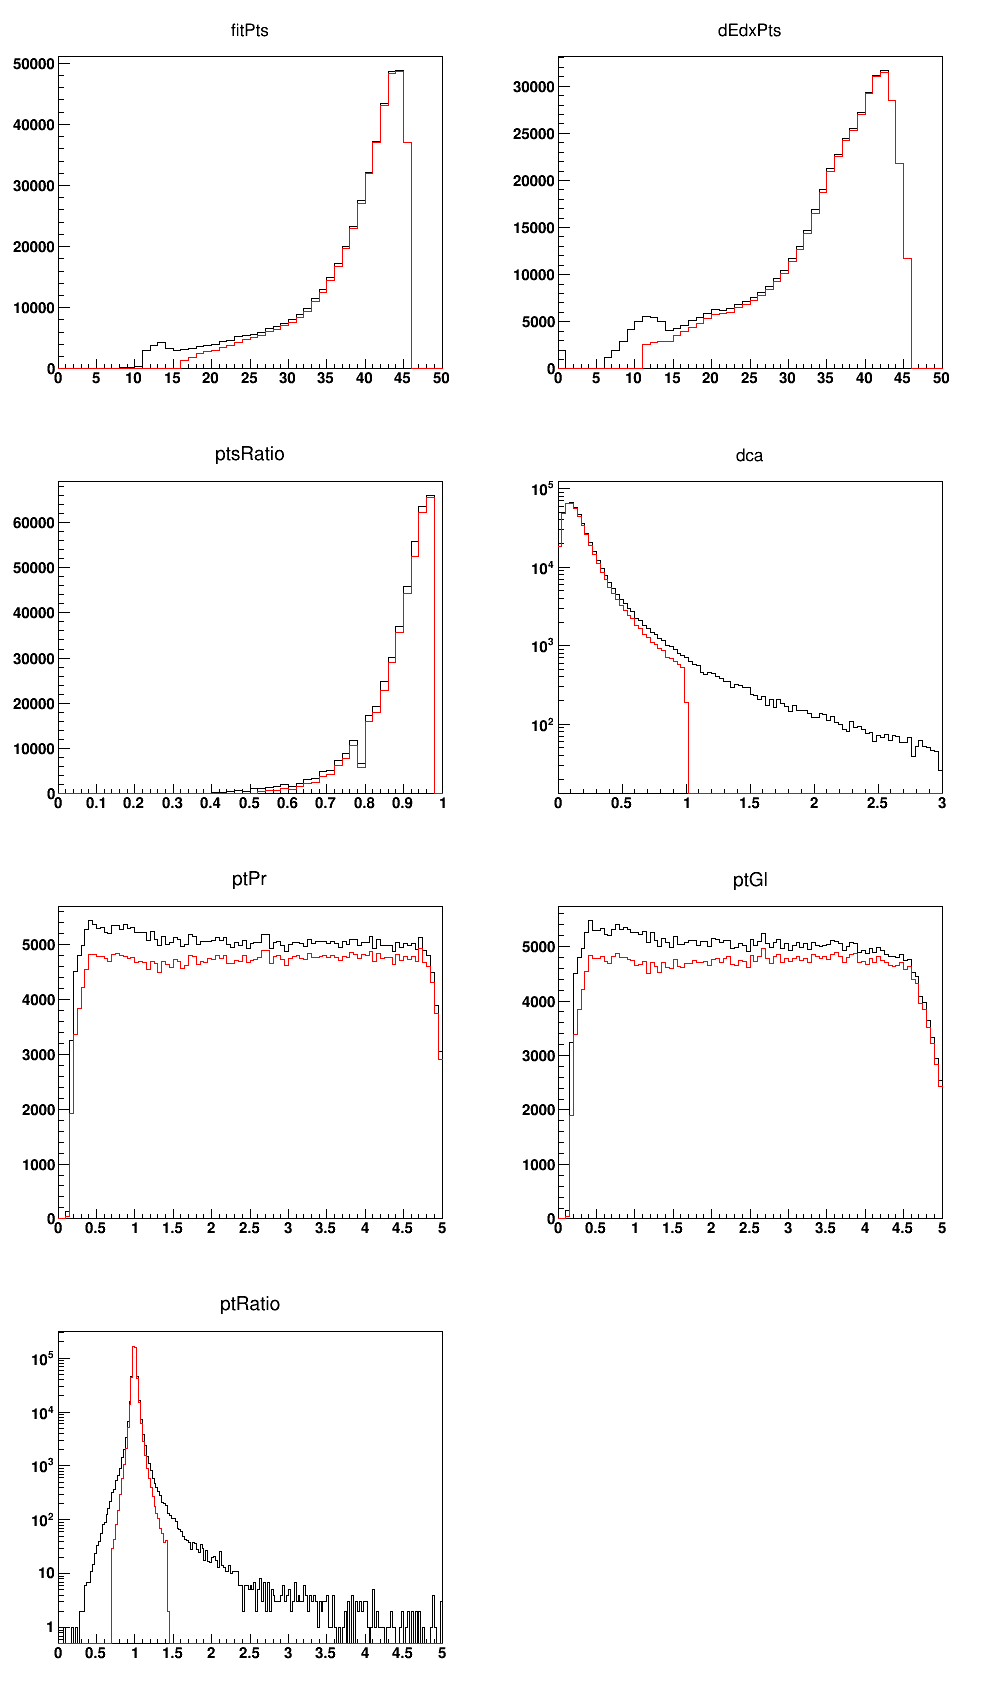

In [3]:

c = Canvas( width=1000, height=1700 )
c.Clear()
ROOT.gStyle.SetOptStat(0)
c.Divide( 2, 4 )

drawPrePost( "fitPts", 1 )
drawPrePost( "dEdxPts", 2 )
drawPrePost( "ptsRatio", 3 )
drawPrePost( "dca", 4, logY=1 )
drawPrePost( "ptPr", 5 )
drawPrePost( "ptGl", 6 )
drawPrePost( "ptRatio", 7, logY=1 )

c


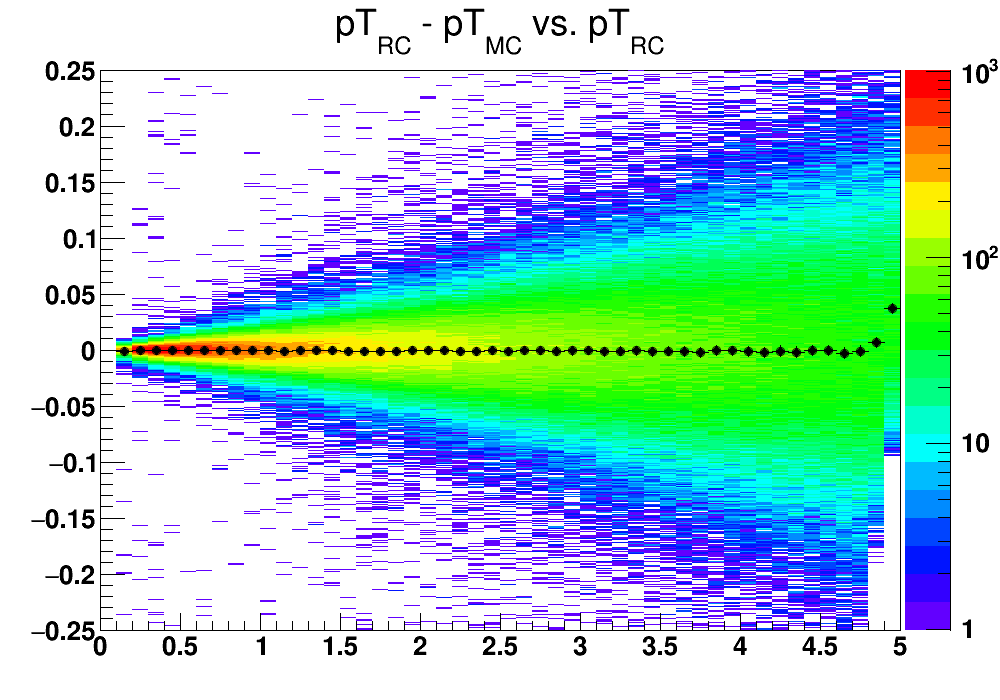

In [4]:
c2 = Canvas(  width=1000, height=700 )
c2.Clear()
hel = f.energyLoss;
hel.Draw("colz")
ROOT.gPad.SetLogz(1)
hel.ProfileX().Draw("same")
c2


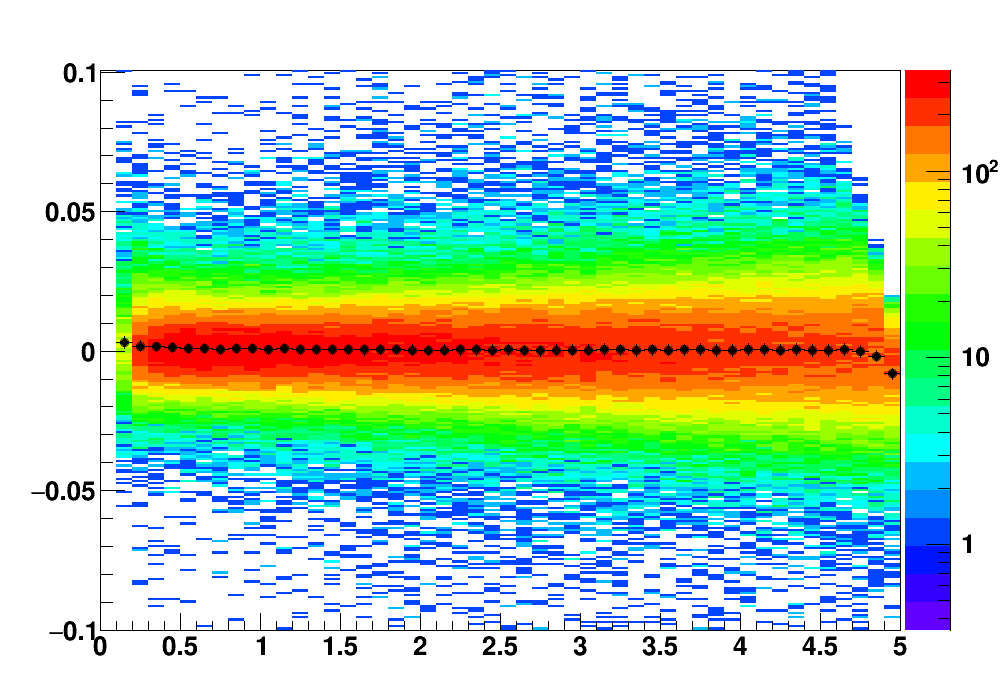

In [5]:
c2.Clear()
hpr = f.ptRes
hpr.Draw("colz")
hpr.GetYaxis().SetRangeUser(-.1, .1)
hpr.ProfileX().Draw("same")
c2


p0 =  0.824987144501
p1 =  0.189899937583
p2 =  2.33533848545


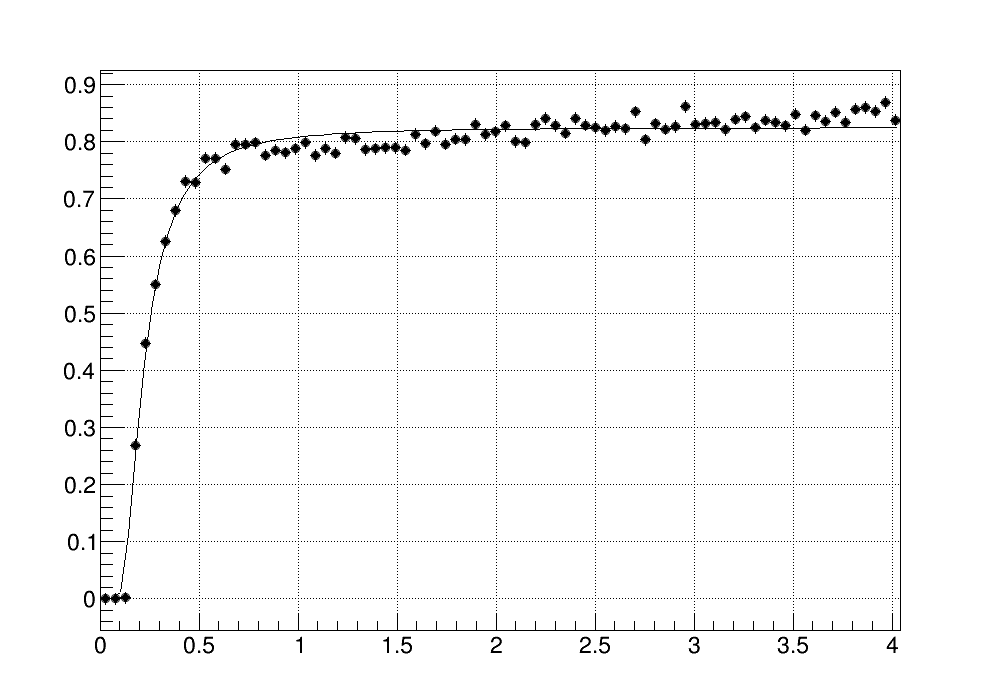

In [10]:
c2 = Canvas(  width=1000, height=700 )
hC = PlotEff( 240, 500, -1.25, 1.25, "ec")
hC.GetXaxis().SetRangeUser( 0.0, 4 )
#hC.Draw("pe")
ROOT.gPad.SetGrid(1, 1)

efunc = ROOT.TF1( "efunc", "[0] * exp( - pow( [1] / x, [2] ) )", 0.0, 5 )
efunc.SetParameters( .25, 0.05, 5.0 )
hC.Fit( efunc, "R" )

print "p0 = ", efunc.GetParameter( 0 ) 
print "p1 = ", efunc.GetParameter( 1 ) 
print "p2 = ", efunc.GetParameter( 2 ) 

c2

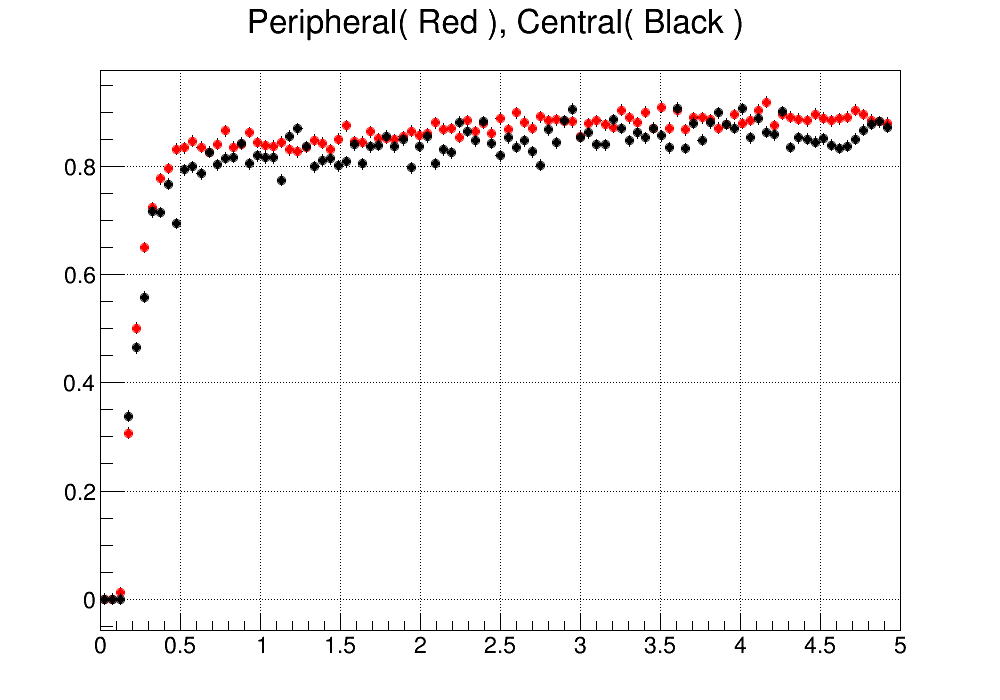

In [19]:
hC = PlotEff( 240, 500, -0.25, 0.25, "ec")
hP = PlotEff( 1, 40, -1.1, 1.1, "ep")

hP.SetMarkerColor( 2 )
hP.Draw()
hP.SetTitle( "Peripheral( Red ), Central( Black ) " )
hC.Draw("same")
c2

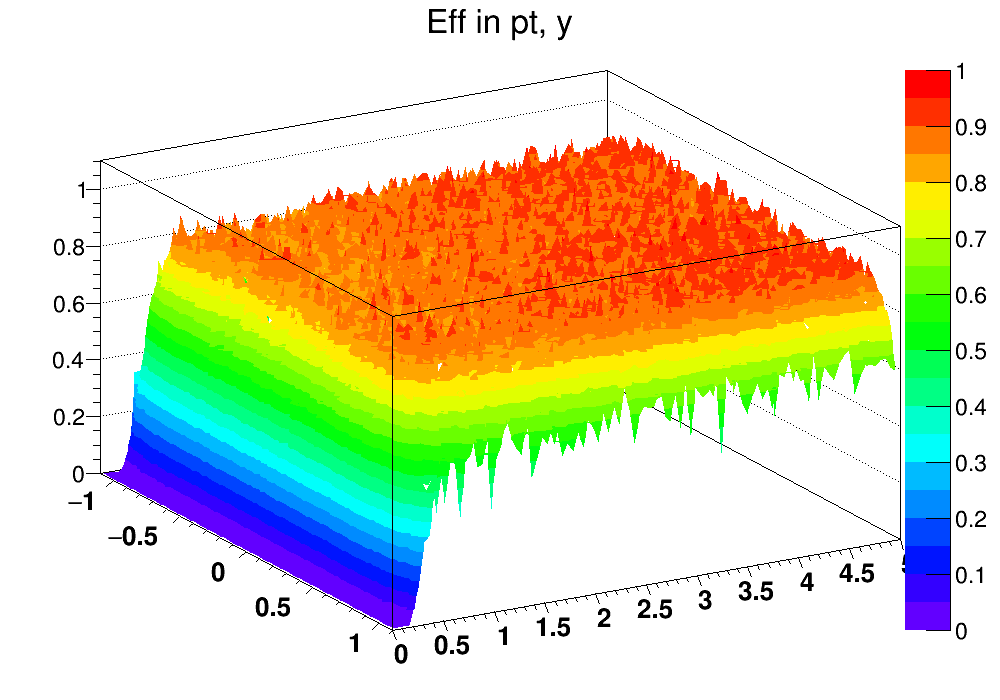

In [20]:
h2D = Plot2DEff( 1, 500, "dan" )
h2D.Draw( "surf2z" )
h2D.SetTitle( "Eff in pt, y" )
theta = 30;
phi = -60;
ROOT.gPad.SetTheta(theta); 
ROOT.gPad.SetPhi(phi); 
ROOT.gPad.Update();
c2

